### Classification of Stars, Galaxies and Quasars. Sloan Digital Sky Survey DR17

This notebook is dedicated to exploring the Stellar dataset from https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17/data.

Note: SDSS DR18 can now be accessed from https://www.sdss.org/dr18/.
Reading assignment: https://arxiv.org/abs/2301.07688.

Helpful Reference: Machine Learning for Physics and Astronomy | Lecture Notebook with Copyright: Viviana Acquaviva (2023)

In [1]:
import os
import pandas as pd
import numpy as np

from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import seaborn as sns

In [2]:
# Data Preparation
csv_path = "datasets\star_classification_DR17.csv"

df = pd.read_csv(csv_path)
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [3]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [4]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [5]:
df.groupby('class').count()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
class,,,,,,,,,,,,,,,,,
GALAXY,59445,59445,59445,59445,59445,59445,59445,59445,59445,59445,59445,59445,59445,59445,59445,59445,59445
QSO,18961,18961,18961,18961,18961,18961,18961,18961,18961,18961,18961,18961,18961,18961,18961,18961,18961
STAR,21594,21594,21594,21594,21594,21594,21594,21594,21594,21594,21594,21594,21594,21594,21594,21594,21594


In [6]:
bindf = df.drop('class', axis=1)
# bindf.head()

In [7]:
bindf['class_label'] = df['class'].replace({'GALAXY':'0', 'QSO':'1', 'STAR':'2'})
bindf['class_label'] = bindf['class_label'].astype(int)

# bindf.head()

In [8]:
bindf.groupby('class_label').count()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
class_label,,,,,,,,,,,,,,,,,
0,59445,59445,59445,59445,59445,59445,59445,59445,59445,59445,59445,59445,59445,59445,59445,59445,59445
1,18961,18961,18961,18961,18961,18961,18961,18961,18961,18961,18961,18961,18961,18961,18961,18961,18961
2,21594,21594,21594,21594,21594,21594,21594,21594,21594,21594,21594,21594,21594,21594,21594,21594,21594


In [25]:
final_features = bindf[['r', 'alpha', 'delta']]
targets = bindf.class_label

# final_features.head()
# targets.head()

In [26]:
final_features.isnull().values.any()

False

In [27]:
final_features.shape, targets.shape

((100000, 3), (100000,))

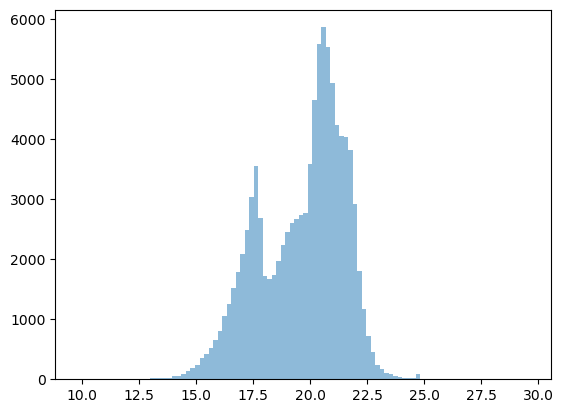

In [28]:
plt.hist(final_features.iloc[:,0], bins=100, alpha=0.5)
plt.show()

In [29]:
final_features.describe()

,r,alpha,delta
count,100000.000000,100000.000000,100000.000000
mean,19.645762,177.629117,24.135305
std,1.854760,96.502241,19.644665
min,9.822070,0.005528,-18.785328
25%,18.135828,127.518222,5.146771
50%,20.125290,180.900700,23.645922
75%,21.044785,233.895005,39.901550
max,29.571860,359.999810,83.000519


In [30]:
pd.concat([final_features, targets], axis=1).groupby('class_label').describe(percentiles=[])

r                                                     \
               count       mean       std       min       50%       max   
class_label                                                               
0            59445.0  19.587552  1.874133  11.74664  20.10459  29.57186   
1            18961.0  20.624089  1.084237  12.35763  20.77272  27.39709   
2            21594.0  18.946969  1.972786   9.82207  18.95508  29.37411   

               alpha                                                           \
               count        mean        std       min         50%         max   
class_label                                                                     
0            59445.0  177.954727  94.403760  0.005528  181.315787  359.994125   
1            18961.0  180.474314  98.962348  0.010959  183.682504  359.999615   
2            21594.0  174.234485  99.876175  0.029838  174.151671  359.999810   

               delta                                                         
               count       mean        std        min        50%        max  
class_label                                                                  
0            59445.0  23.513911  19.315205 -12.364701  22.301731  77.615588  
1            18961.0  26.808621  19.588410 -15.980904  29.299167  82.288657  
2            21594.0  23.498554  20.383288 -18.785328  23.400565  83.000519

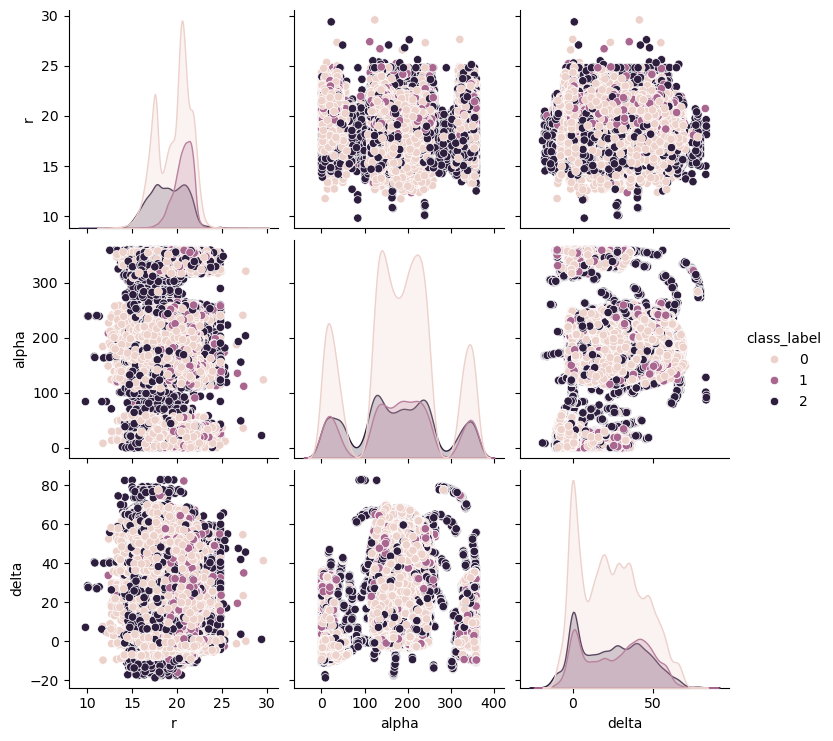

In [24]:
plotdf = bindf[['r', 'alpha', 'delta', 'class_label']]
plotdf.head()

sns.pairplot(plotdf, hue='class_label', diag_kind='kde')
plt.show()